## Name : Pravin Nandankar
## Roll No : 58
## Batch : C4
## Assessment 1 Machine Learning

#### import Libraries

In [74]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [76]:
## Load Datasets
data = pd.read_csv('stroke-data.csv')

#### Perform EDA

In [78]:
## first five rows
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [80]:
## last five rows
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [82]:
## print data types
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [86]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [88]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [90]:
## columns values 
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [92]:
## check for duplicates
data.duplicated().sum()

0

In [94]:
# Function for univariate analysis of numerical variables
def univariate_analysis(data, column):
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

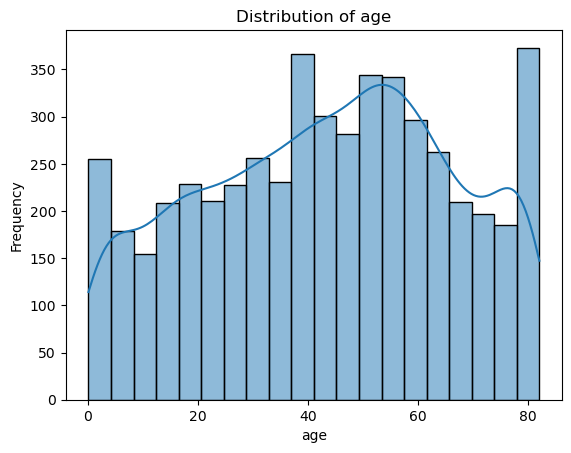

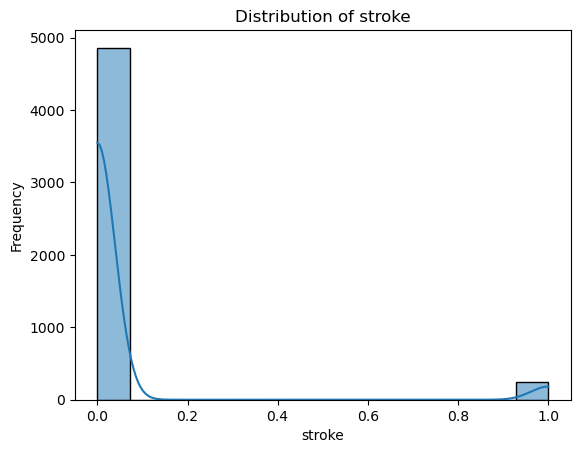

In [367]:
univariate_analysis(data, 'age')
univariate_analysis(data, 'stroke')

In [230]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,0,3,0,202.21,NaN,2,1
2,31112,0,80.0,0,1,0,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,0,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,0,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,0,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,0,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,0,3,0,82.99,30.6,2,0
5108,37544,0,51.0,0,0,0,2,0,166.29,25.6,1,0


In [250]:
## x as feature variables and y as Target Variable
X = data[['gender','age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi']]
# X = data.drop('stroke',axis=1)
Y = data['stroke']

In [326]:
from sklearn.impute import SimpleImputer
# Impute missing values in bmi
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Impute missing values in X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.3, random_state=42)


In [328]:
X.shape,Y.shape

((5110, 8), (5110,))

In [330]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3577, 8), (3577,), (1533, 8), (1533,))

In [332]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Fit the model with the training data
lr.fit(X_train, y_train)

#  make predictions
y_pred = lr.predict(X_test)


Accuracy: 0.9419439008480104


### Evaluate the model

In [370]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9419439008480104


In [334]:
metrics.confusion_matrix(y_test, y_pred)

array([[1444,    0],
       [  89,    0]], dtype=int64)

In [336]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



### Hyper Paramter Tunning on Linear Regression

In [402]:
# Defining hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Implementing GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [403]:
# Making predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.9419439008480104
Confusion Matrix:
 [[1444    0]
 [  89    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



## Decision Tree Algorithm

In [415]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [417]:
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [419]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



DecisionTreeClassifier()

In [421]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



DecisionTreeClassifier(max_depth=10)

In [347]:
for i in range(1,50,5):  # loop to check best accuracy from 1 to 50 in range of 5
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(X_train,y_train)
    ypred=dt2.predict(X_test)
    print(f"{i}: {accuracy_score(y_test,y_pred)}")

1: 0.9419439008480104
6: 0.9419439008480104
11: 0.9419439008480104
16: 0.9419439008480104
21: 0.9419439008480104
26: 0.9419439008480104
31: 0.9419439008480104
36: 0.9419439008480104
41: 0.9419439008480104
46: 0.9419439008480104


#### Hyper paramter Tunning

In [379]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 10, 11, 12, 18],
          'min_samples_leaf' : [10, 20,30, 50,100],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [381]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 18],
                         'min_samples_leaf': [10, 20, 30, 50, 100]})

In [389]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}

In [391]:
my_best_preds = grid_search.predict(X_test)

In [393]:
accuracy_score(y_test, my_best_preds)

0.9419439008480104